<a href="https://colab.research.google.com/github/yeonjulee812/Kaggle_study/blob/main/5%EC%A3%BC%EC%B0%A8.%20Bike_Rental_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Manipulation
Importing libraries

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm

In [11]:
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)

Importing dataset

In [12]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SeoulBikeData.csv', encoding='unicode_escape', parse_dates=[0])

Dataset View

In [13]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [15]:
df=df.astype({'Rented Bike Count': 'float', 'Hour':'object'})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   float64       
 2   Hour                       8760 non-null   object        
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [17]:
df=df.rename(columns={'Temperature(°C)': 'Temperature', 'Humidity(%)':'Humidity', 'Rainfall(mm)':'Rainfall', 'Snowfall(cm)':'Snowfall', 'Wind speed(m/s)':'Wind speed', 'Visibility(10m)':'Visibility', 'Solar Radiation(MJ/m2)':'Radiation', 'Dew point temperature(°C)': 'Dew point temperature'})

Summary Statistics

In [18]:
df.describe().style.background_gradient()

,Rented Bike Count,Temperature,Humidity,Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall,Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


Checking for unique values in all attribute

In [19]:
df.nunique().sort_values(ascending=True)

Holiday                       2
Functioning Day               2
Seasons                       4
Hour                         24
Snowfall (cm)                51
Rainfall                     61
Wind speed (m/s)             65
Humidity                     90
Solar Radiation (MJ/m2)     345
Date                        365
Temperature                 546
Dew point temperature       556
Visibility (10m)           1789
Rented Bike Count          2166
dtype: int64

Checking for missing values in each column

In [20]:
df.isnull().sum()

Date                       0
Rented Bike Count          0
Hour                       0
Temperature                0
Humidity                   0
Wind speed (m/s)           0
Visibility (10m)           0
Dew point temperature      0
Solar Radiation (MJ/m2)    0
Rainfall                   0
Snowfall (cm)              0
Seasons                    0
Holiday                    0
Functioning Day            0
dtype: int64

percentage of missing values in each column

In [21]:
pd.options.display.float_format = '{:,.2f} %'.format #소수점 앞에는 다 보여주고, 소수점 뒤에는 두 자리까지만 출력.
print((df.isnull().sum()/len(df))*100)
#pd.options.display.float_format = '{:,.2f}'.format

Date                      0.00 %
Rented Bike Count         0.00 %
Hour                      0.00 %
Temperature               0.00 %
Humidity                  0.00 %
Wind speed (m/s)          0.00 %
Visibility (10m)          0.00 %
Dew point temperature     0.00 %
Solar Radiation (MJ/m2)   0.00 %
Rainfall                  0.00 %
Snowfall (cm)             0.00 %
Seasons                   0.00 %
Holiday                   0.00 %
Functioning Day           0.00 %
dtype: float64


### Data Visualization
Missing Value Plot

In [22]:
import missingno as msno

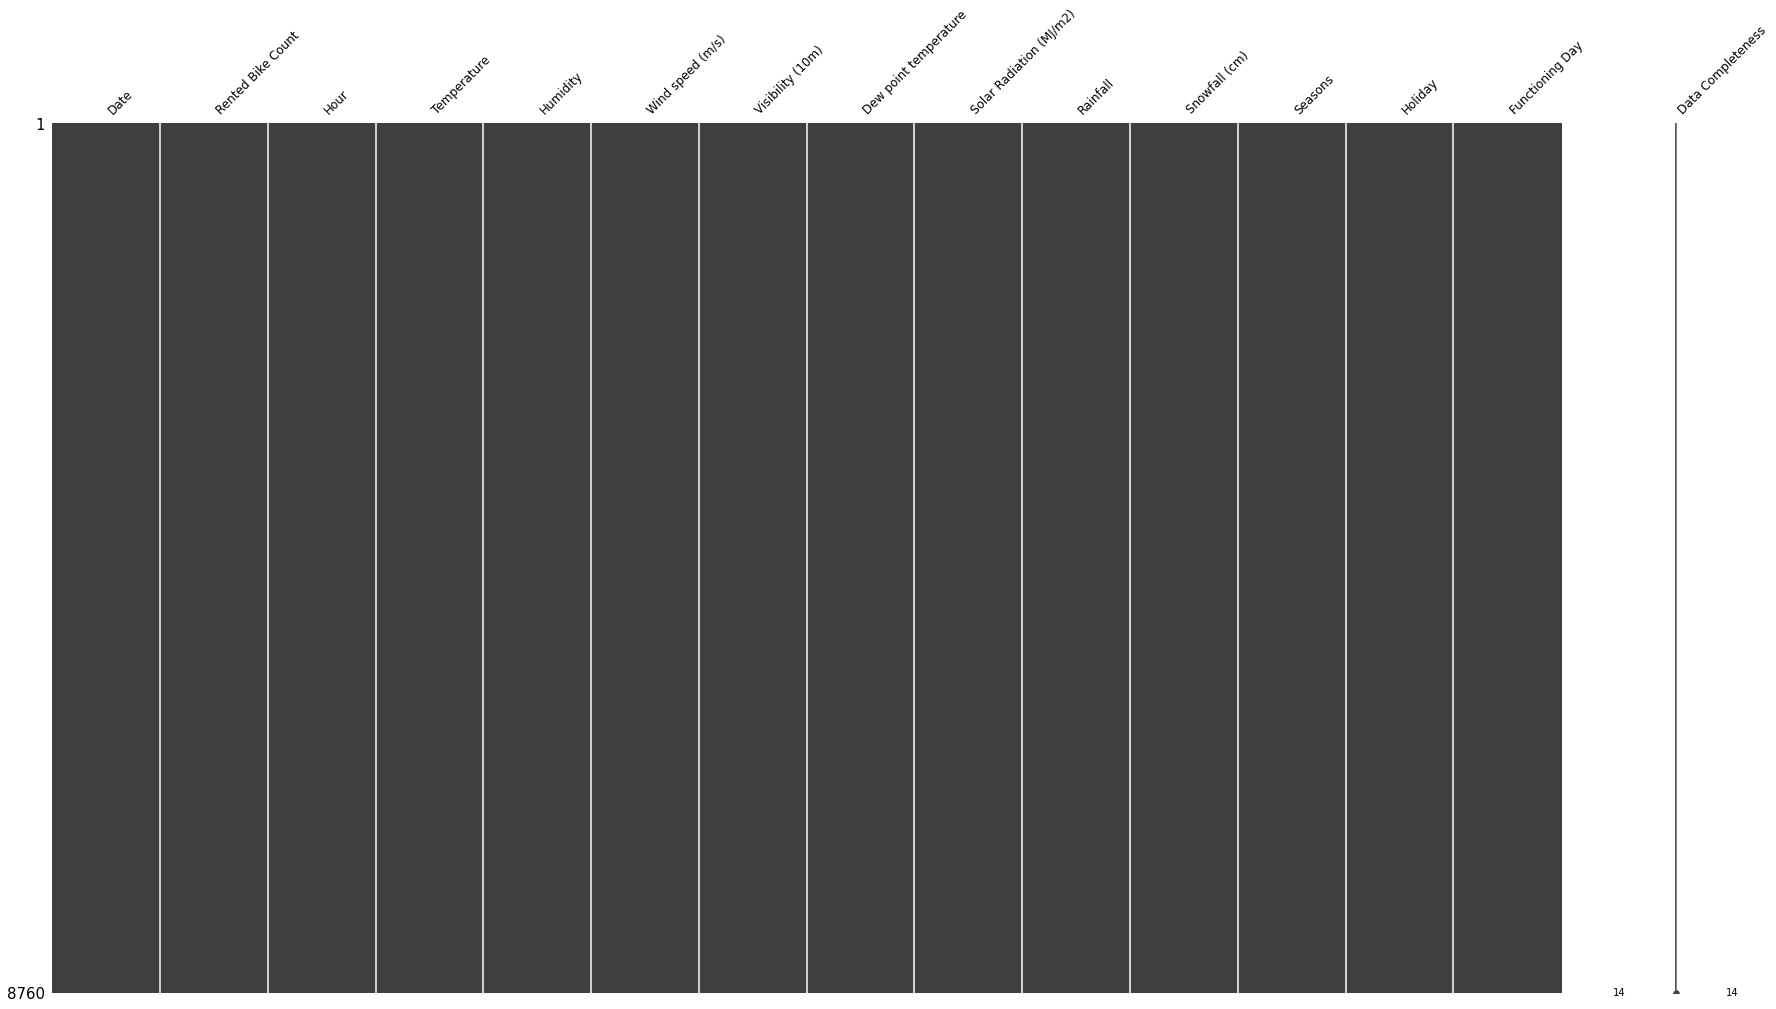

In [23]:
msno.matrix(df, labels=[df.columns], figsize=(30,16), fontsize=12)

Bar Plot

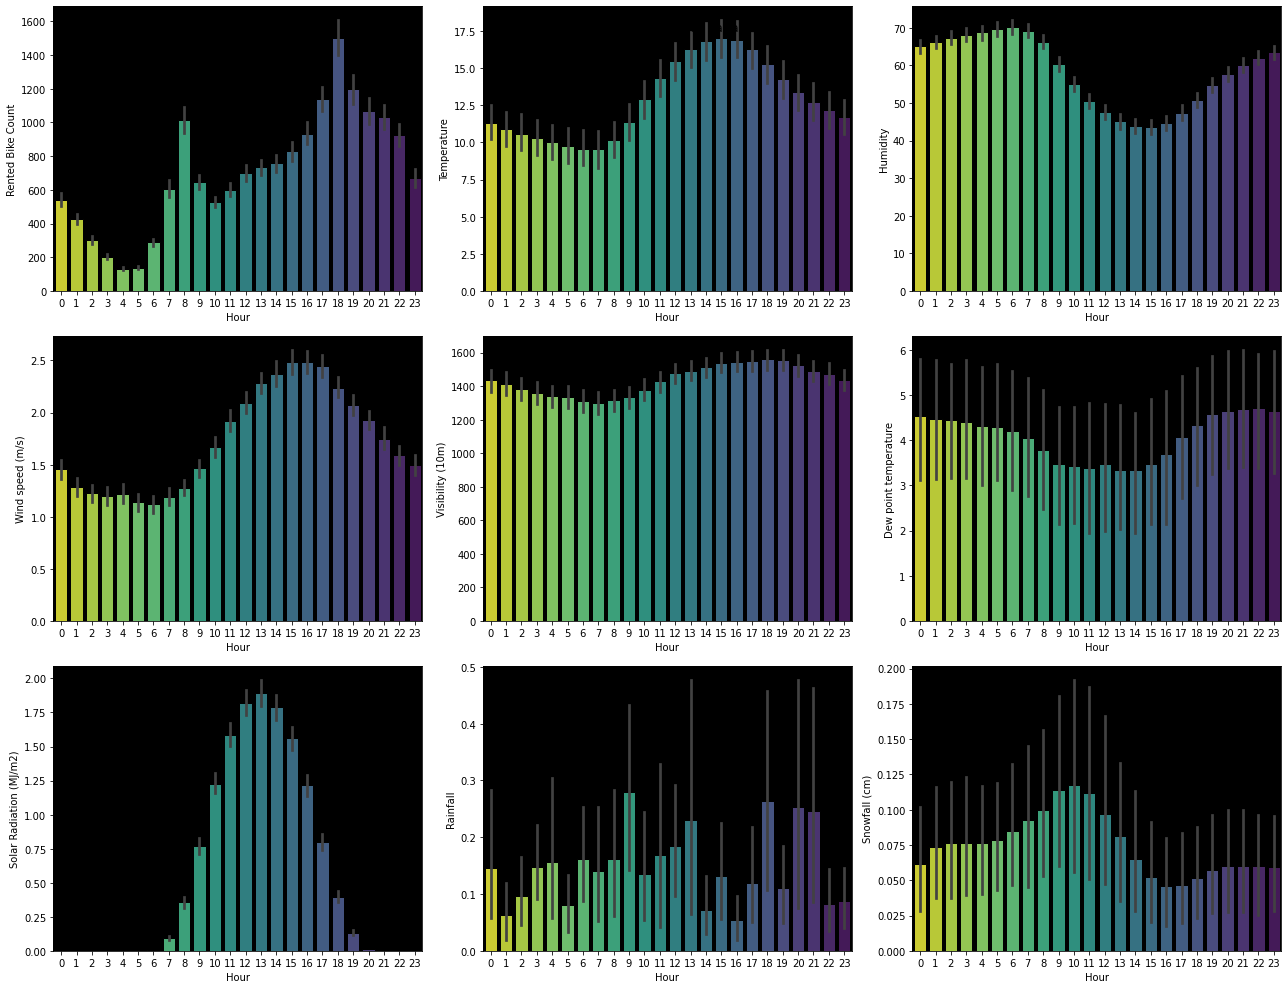

In [24]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int']).columns):
  plt.rcParams['axes.facecolor'] ='black'
  ax = plt.subplot(4,3,i+1)
  sns.barplot(data=df, x='Hour', y=col, edgecolor='black', ax=ax, palette='viridis_r')
  
plt.suptitle('Data distribution of continous variables')
plt.tight_layout() #subplot들이 겹치지 않도록 최소한의 여백을 만들어주는 역할
# 시간에 따른 각 변수의 왜도를 파악할 수 있음

In [25]:
## 참고
#enumerate(): 원소뿐 아니라 인덱스도 함께 출력 시 활용
for entry in enumerate(['A','B','C']):
  print(entry)
print('\n')
#인자 풀기
for i, letter in enumerate(['A','B','C']):
  print(i, letter)
print('\n')
#2차원 리스트 루프
matrix = [['A','B','C'], ['D','E','F'], ['G','H','I']]
for r, row in enumerate(matrix):
  for c, letter in enumerate(row):
    print(r, c, letter)

(0, 'A')
(1, 'B')
(2, 'C')


0 A
1 B
2 C


0 0 A
0 1 B
0 2 C
1 0 D
1 1 E
1 2 F
2 0 G
2 1 H
2 2 I


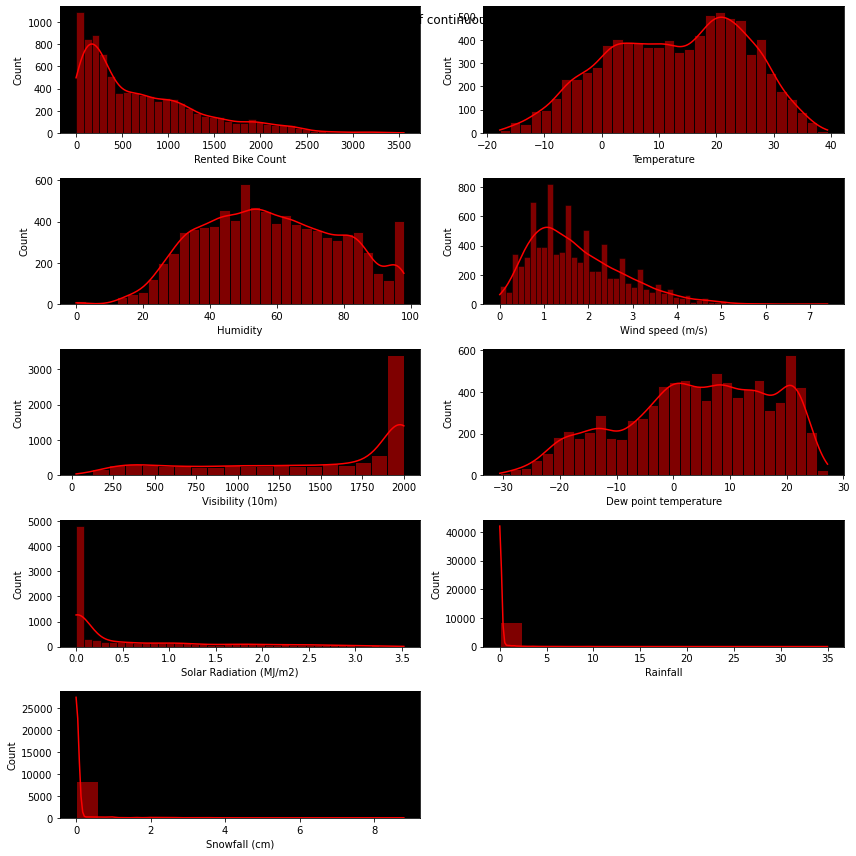

In [26]:
plt.figure(figsize=(12,12))
for i, col in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
  plt.rcParams['axes.facecolor'] = 'black'
  ax = plt.subplot(5,2, i+1)
  sns.histplot(data=df, x=col, ax=ax, color='red', kde=True)
  #kde : 곡선으로 부드럽게 그려줌. 커널밀도추정 #plt.kdeplot()
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()
#각 변수의 분포의 상관정도를 그래프 간 유사성을 통해 파악 가능

Box Plot

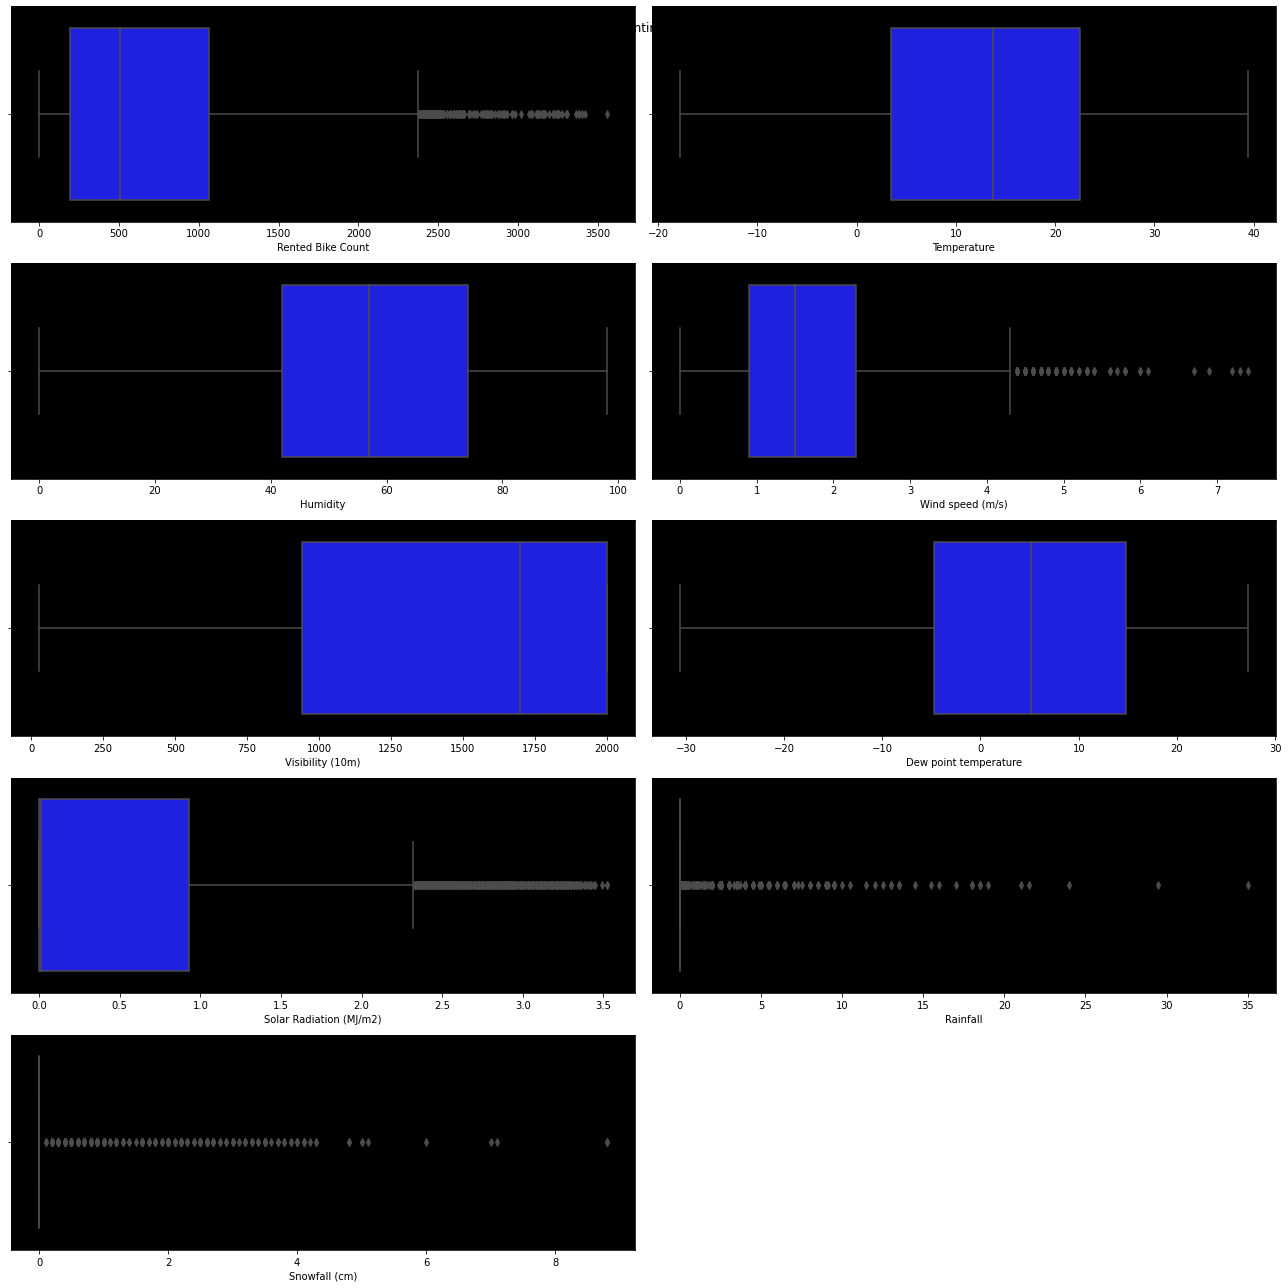

In [27]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
  plt.rcParams['axes.facecolor']='black'
  ax=plt.subplot(5,2,i+1)
  sns.boxplot(data=df, x=col, ax=ax, color='blue')
plt.suptitle('Box Plot of continous variables')
plt.tight_layout()

Power Transformation

In [28]:
var = list(df.select_dtypes(include=['float64', 'int64']).columns)
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method='yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

Data distribution after applying Power Transformer

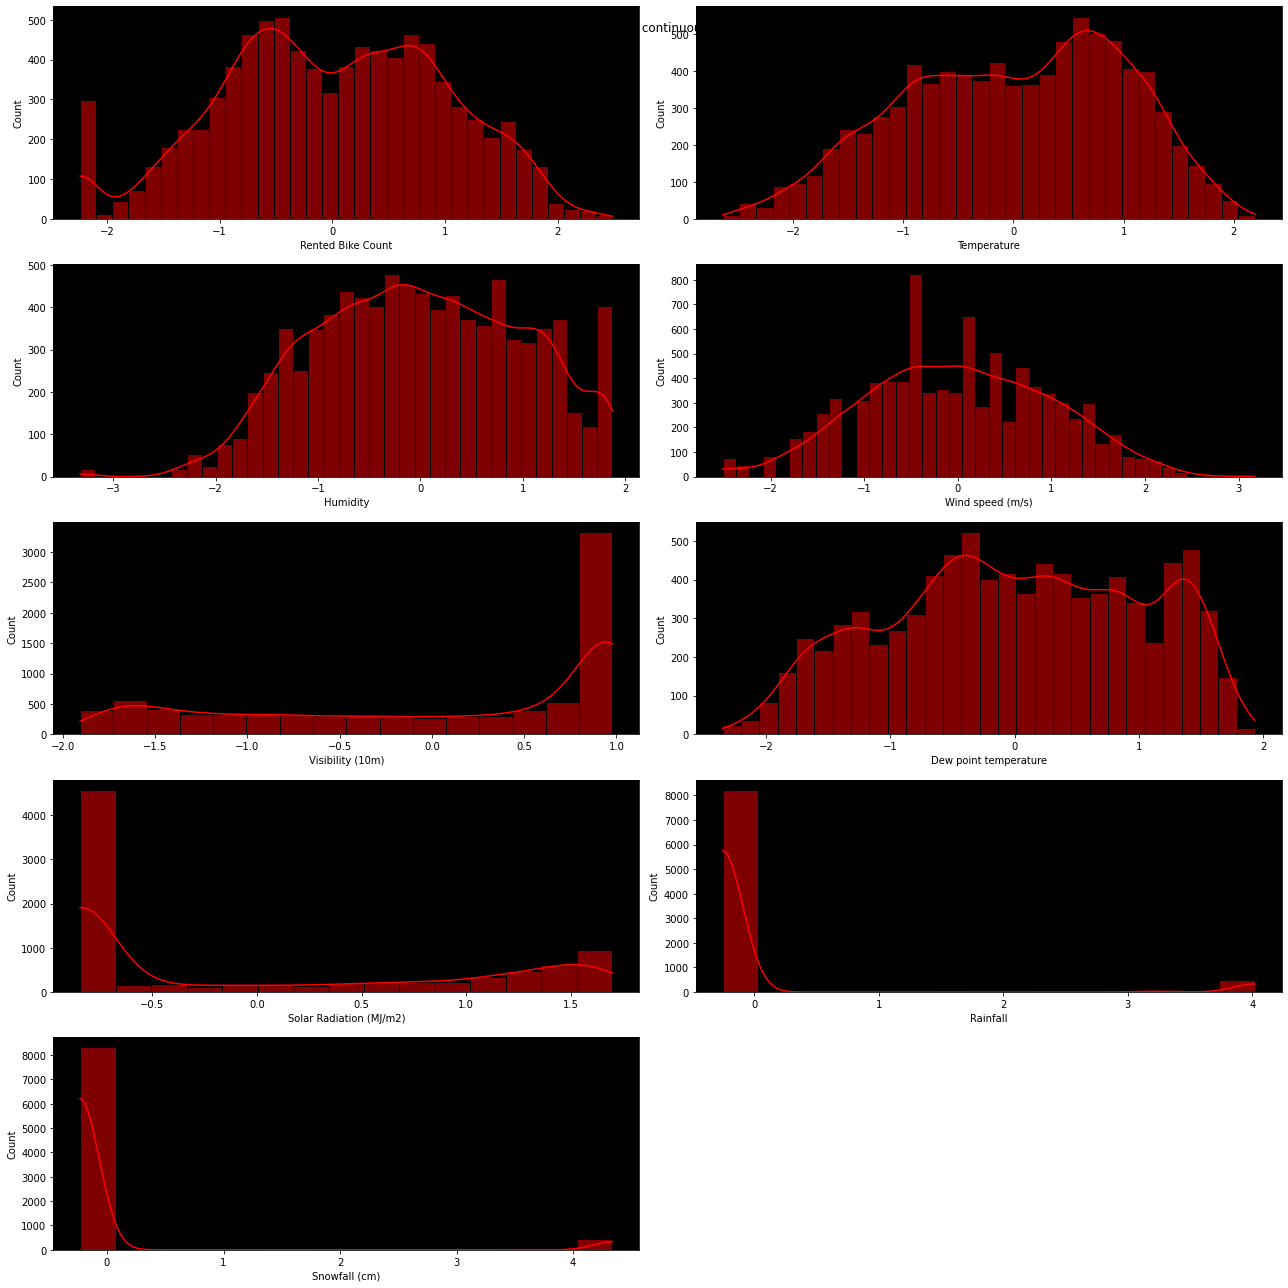

In [29]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
  plt.rcParams['axes.facecolor']='black'
  ax=plt.subplot(5,2,i+1)
  sns.histplot(data=df, x=col, ax=ax, color='red', kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()
#PowerTransformer을 거치고 난 후 보다 대칭적으로 변함.

Box Plot after applying Power Transformer

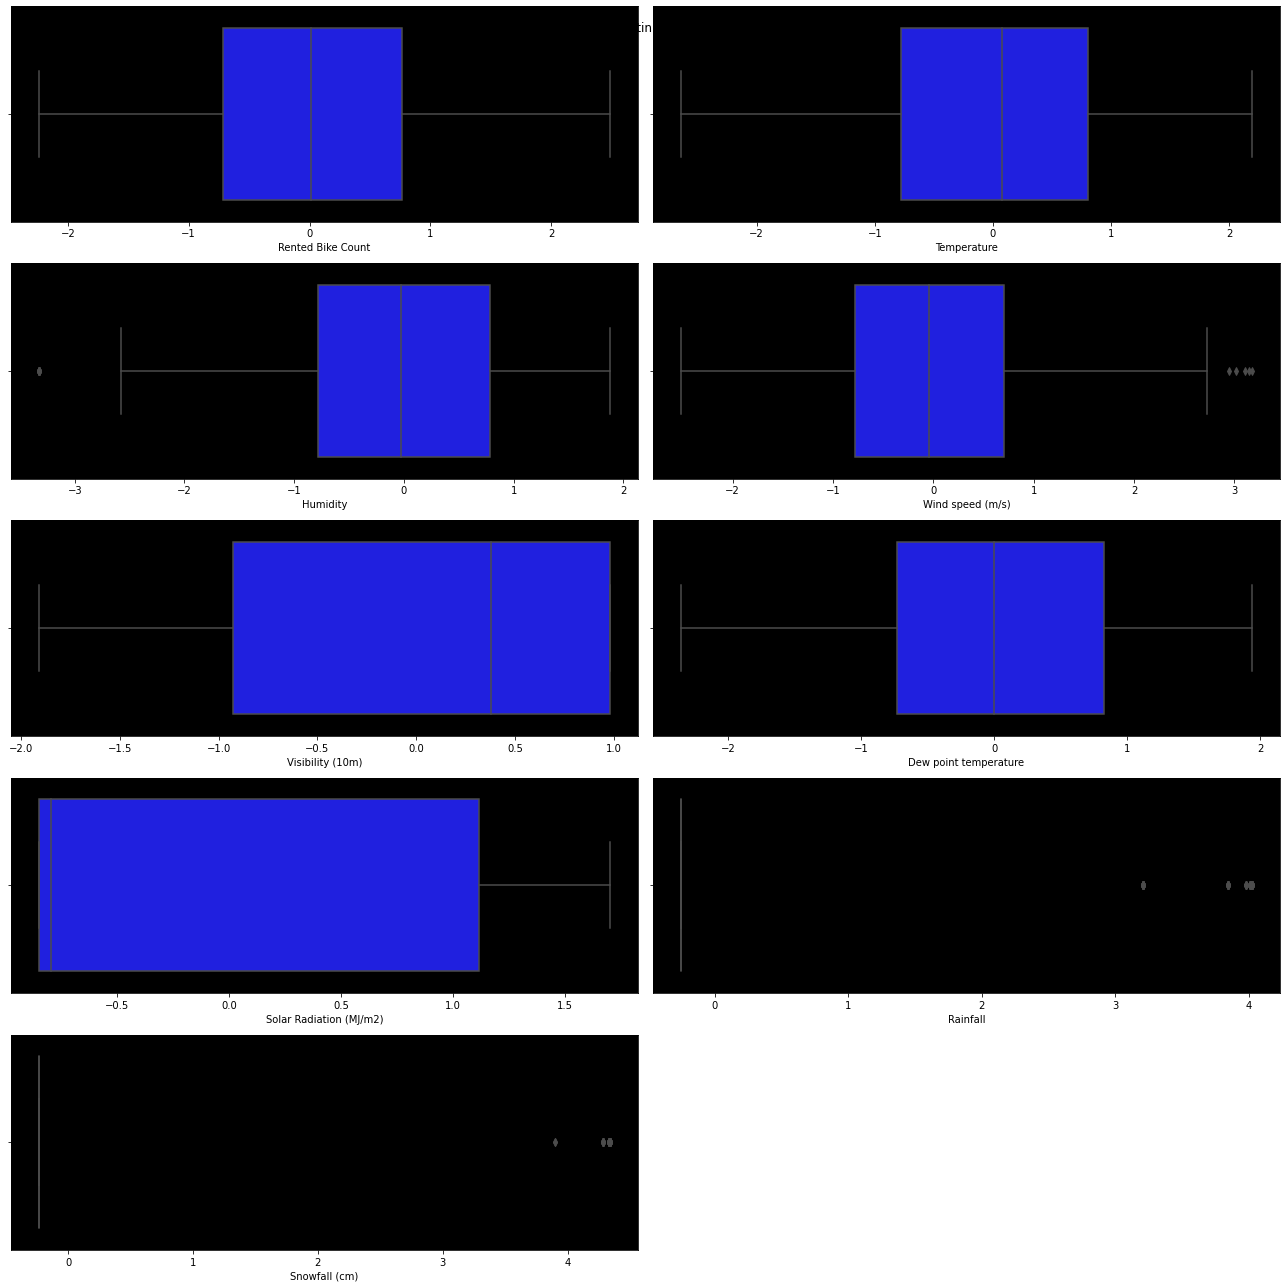

In [30]:
plt.figure(figsize=(18,18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
  plt.rcParams['axes.facecolor']='black'
  ax=plt.subplot(5,2,i+1)
  sns.boxplot(data=df, x=col, ax=ax, color='blue')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

Heatmap

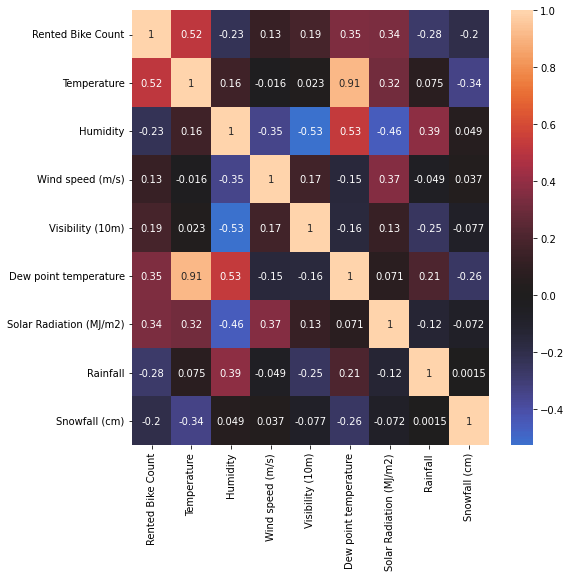

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(df.select_dtypes(include=['float64']).corr(), annot=True, center=0)
plt.show()

Analysing Categorical Variable

Pie Chart

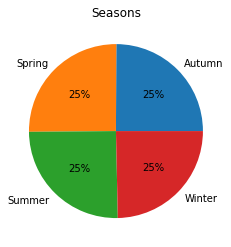

In [32]:
season_var=pd.crosstab(index=df['Seasons'], columns='% observations')
# 2개 요인 이상에 대해 요인별로 교차분석(cross tabulations)해서 도수분포표 만듦 
# 이 경우 열이 하나만 나오는 게 아닌가? 굳이 crosstab을 하는 이유?
plt.pie(season_var['% observations'], labels=season_var['% observations'].index, autopct='%.0f%%')
# observation을 받아 소수점 0째자리까지 표현
plt.title('Seasons')
plt.show()

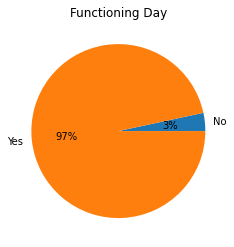

In [33]:
Functioning_Day_var=pd.crosstab(index=df['Functioning Day'], columns='% observations')
plt.pie(Functioning_Day_var['% observations'], labels=Functioning_Day_var['% observations'].index, autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

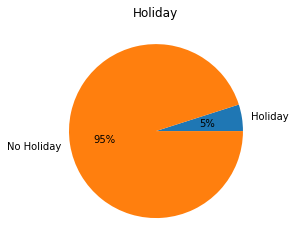

In [34]:
holiday_var=pd.crosstab(index=df['Holiday'], columns='% observations')
plt.pie(holiday_var['% observations'], labels=holiday_var['% observations'].index, autopct='%.0f%%')
plt.title('Holiday')
plt.show()

Count plot shows that the Seasons variable is balanced

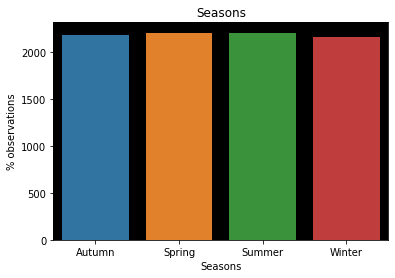

In [35]:
sns.barplot(x=season_var.index, y=season_var['% observations'])
plt.title('Seasons')
plt.show()

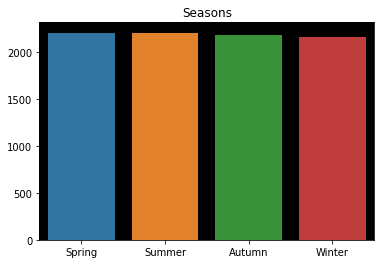

In [36]:
# 보다 친숙한 방식으로 동일한 그래프를 그려보았다. 
sns.barplot(x=df['Seasons'].value_counts().index, y=df['Seasons'].value_counts().to_list(), data=df)
plt.title('Seasons')
plt.show()

In [37]:
df=pd.get_dummies(df, columns=['Holiday', 'Seasons', 'Functioning Day', 'Hour'], drop_first=True)

In [38]:
X=df.iloc[:, 2:]
y=df.iloc[:, 1]

Variance Inflation Factor

In [39]:
# VIF(분산팽창인수)는 다중 회귀 모델에서 독립 변수간 상관 관계가 있는지 측정하는 척도입니다
# 독립 변수 X는 종속 변수 Y 하고만 상관 관계가 있어야 하며, 독립 변수끼리 상관 관계가 있어서는 안 됩니다.
# 독립 변수간 상관 관계를 보이는 것을 다중공선성(Multicollinearity)이라고 합니다.

# 1 = not correlated
# between 1 and 5 = moderately correlated
# greater than 5 = highly correlated

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  vif=pd.DataFrame()
  vif['variables']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)


In [40]:
calc_vif(X.select_dtypes(include=['float', 'int']))
# Dew point temperature의 다중공선성이 높다.
# % 왜 붙는지?

,variables,VIF
0,Temperature,45.79 %
1,Humidity,12.01 %
2,Wind speed (m/s),1.23 %
3,Visibility (10m),1.56 %
4,Dew point temperature,60.27 %
5,Solar Radiation (MJ/m2),1.86 %
6,Rainfall,1.20 %
7,Snowfall (cm),1.17 %


In [41]:
# Dew point temperature 피쳐 제거
del X['Dew point temperature']

In [42]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,1.56 %
1,Humidity,2.44 %
2,Wind speed (m/s),1.23 %
3,Visibility (10m),1.50 %
4,Solar Radiation (MJ/m2),1.83 %
5,Rainfall,1.19 %
6,Snowfall (cm),1.16 %


Feature Selection

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression # Correlation

In [44]:
fs = SelectKBest(score_func=f_regression, k='all') # k: Number of top features to select. default='10'
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x7f0e156d7950>)

In [45]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

Feature importance Graph

Temperature: 24.19%
Humidity: 3.52%
Wind speed (m/s): 1.16%
Visibility (10m): 2.43%
Solar Radiation (MJ/m2): 8.55%
Rainfall: 5.65%
Snowfall (cm): 2.65%
Holiday_No Holiday: 0.53%
Seasons_Spring: 0.07%
Seasons_Summer: 6.95%
Seasons_Winter: 13.04%
Functioning Day_Yes: 13.83%
Hour_1: 0.27%
Hour_2: 0.91%
Hour_3: 1.95%
Hour_4: 3.25%
Hour_5: 3.11%
Hour_6: 1.15%
Hour_7: 0.02%
Hour_8: 0.47%
Hour_9: 0.00%
Hour_10: 0.05%
Hour_11: 0.00%
Hour_12: 0.04%
Hour_13: 0.08%
Hour_14: 0.11%
Hour_15: 0.21%
Hour_16: 0.39%
Hour_17: 0.93%
Hour_18: 2.18%
Hour_19: 0.97%
Hour_20: 0.56%
Hour_21: 0.49%
Hour_22: 0.28%
Hour_23: 0.00%


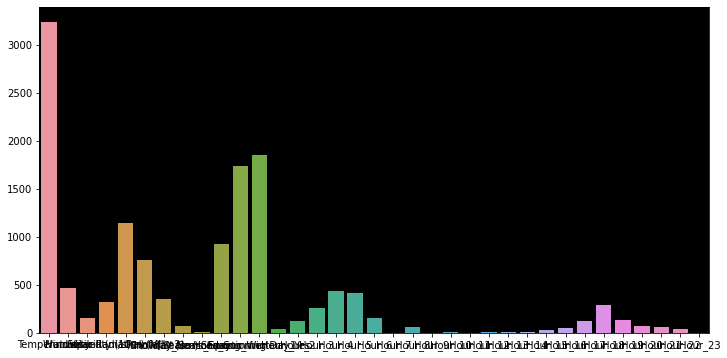

In [46]:
for i, j in enumerate(X.columns):
  print(f'{j}: {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns, y=fs.scores_)
plt.show()
# 피쳐 중요도가 높은 변수들만 분석에 포함시킴.

In [47]:
#f string 예제1
s = 'coffee'
n = 5
result1 = f'저는 {s}를 좋아합니다. 하루 {n}잔 마셔요.'
print(result1, '\n')

#f string 예제2
month=1
while month<=12:
    print(f'2022년 {month}월')
    month=month+1

저는 coffee를 좋아합니다. 하루 5잔 마셔요. 

2022년 1월
2022년 2월
2022년 3월
2022년 4월
2022년 5월
2022년 6월
2022년 7월
2022년 8월
2022년 9월
2022년 10월
2022년 11월
2022년 12월


Splitting our dataset into train and test set

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#splitting our dataset in 80% training and 20% testset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=0)

Feature Scaling

In [50]:
# Normalization, Standardization, Regularization이 존재하며, 그 중 Standardization 활용.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Modeling
Performance Measures for Regression : R-Square, Mean Square Error

K-fold Cross validation

In [51]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [52]:
# creating dictionary for storing different models accuracy
model_comparison={}

Linear Regression

In [64]:
model=LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f'Model MSE : {mean_squared_error(y_test, y_pred)*100:.2f}%')
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5) # cv는 폴드 수
print('Cross Val Acurracy : {:.2f}%'.format(accuracies.mean()*100))
print('Cross Val Standard Deviation : {:.2f}%'.format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), accuracies.mean(), accuracies.std()]

Model R-Square : 81.03%
Model MSE : 19.42%
Cross Val Acurracy : 80.35%
Cross Val Standard Deviation : 0.45%


Linear Regression Summary

In [65]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit() # Ordinary Least Squares, 최소제곱법
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.806
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              829.7
Date:                Wed, 16 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:24:17   Log-Likelihood:                         -4169.2
No. Observations:                7008   AIC:                                      8408.
Df Residuals:                    6973   BIC:                                      8648.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3587      0.012     29.166      0.000       0.335       0.383
x2            -0.1108      0.009    -12.542      0.000      -0.128      -0.093
x3            -0.0187      0.006     -2.981      0.003      -0.031      -0.006
x4             0.0109      0.007      1.606      0.108      -0.002       0.024
x5             0.2300      0.016     14.640      0.000       0.199       0.261
x6            -0.2592      0.006    -43.834      0.000      -0.271      -0.248
x7            -0.0006      0.006     -0.108      0.914      -0.012       0.011
x8             0.0498      0.005      9.370      0.000       0.039       0.060
x9            -0.1046      0.007    -15.105      0.000      -0.118      -0.091
x10           -0.0956      0.009    -11.157      0.000      -0.112      -0.079
x11           -0.2737      0.010    -28.090      0.000      -0.293      -0.255
x12            0.4664      0.005     85.402      0.000       0.456       0.477
x13           -0.0379      0.007     -5.183      0.000      -0.052      -0.024
x14           -0.0870      0.007    -11.747      0.000      -0.102      -0.072
x15           -0.1166      0.007    -16.080      0.000      -0.131      -0.102
x16           -0.1725      0.007    -23.778      0.000      -0.187      -0.158
x17           -0.1620      0.007    -22.476      0.000      -0.176      -0.148
x18           -0.0771      0.007    -10.528      0.000      -0.091      -0.063
x19            0.0010      0.008      0.129      0.898      -0.014       0.016
x20            0.0634      0.008      8.081      0.000       0.048       0.079
x21           -0.0351      0.009     -4.078      0.000      -0.052      -0.018
x22           -0.1120      0.009    -12.257      0.000      -0.130      -0.094
x23           -0.1119      0.009    -11.885      0.000      -0.130      -0.093
x24           -0.0931      0.010     -9.765      0.000      -0.112      -0.074
x25           -0.0969      0.009    -10.207      0.000      -0.116      -0.078
x26           -0.0927      0.010     -9.707      0.000      -0.111      -0.074
x27           -0.0757      0.009     -8.020      0.000      -0.094      -0.057
x28           -0.0463      0.009     -5.119      0.000      -0.064      -0.029
x29            0.0156      0.009      1.828      0.068      -0.001       0.032
x30            0.1208      0.008     15.744      0.000       0.106       0.136
x31            0.0924      0.007     12.363      0.000       0.078       0.107
x32            0.0854      0.007     11.799      0.000       0.071       0.100
x33            0.0977      0.007     13.370      0.000       0.083       0.112
x34            0.0724      0.007      9.928      0.000       0.058       0.087
x35            0.0193      0.007      2.655      0.008       

Assumptions of linear regression

In [67]:
residuals=lin_reg.resid
fitted_value=lin_reg.fittedvalues

In [68]:
np.mean(residuals)

0.009046584380598157

Checking for normality of the residuals

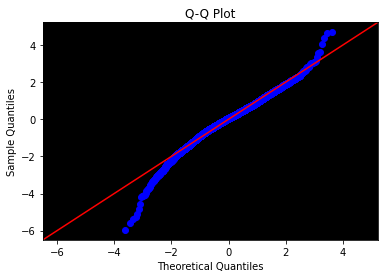

In [69]:
sm.qqplot(residuals, fit=True, line='45')
plt.title('Q-Q Plot')
plt.show()

Checking for homoscedasticity

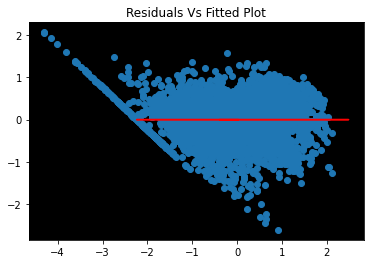

In [70]:
# 등분산성 확인
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train), c='r') # 가운데 항 무슨 의미
plt.title('Residuals Vs Fitted Plot')
plt.show()

Polynomial Regression

In [71]:
# 다항회귀
poly_reg=PolynomialFeatures(degree=2) # 2차 다항 생성
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train), y_train)
y_pred = model.predict(poly_reg.fit_transform(X_test))
print(f'Model R-Square: {r2_score(y_test, y_pred)*100:.2f}%')
print(f'Model MSE: {mean_squared_error(y_test, y_pred)*100:.2f}%')
accuracies=cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print('Cross Val Accuracy: {:.2f}%'.format(accuracies.mean()*100))
print('Cross Val Standard Deviation:{:.2f}%'.format(accuracies.std()*100))
model_comparison['Polynomial Regression']=[r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred), accuracies.mean(), accuracies.std()]

Model R-Square: 89.27%
Model MSE: 10.99%
Cross Val Accuracy: 80.35%
Cross Val Standard Deviation:0.45%


Decision Tree Regression

In [72]:
model=DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f'Model R-Square : {r2_score(y_test, y_pred)*100:.2f}%')
print(f'Model MSE : {mean_squared_error(y_test, y_pred)*100:.2f}%')
accuracies=cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print('Cross Val Accuracy : {:.2f}%'.format(accuracies.mean()*100))
print('Cross Val Standard Deviation : {:.2f}%'.format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test, y_pred), mean_squared_error(y_test,y_pred), accuracies.mean(), accuracies.std()]

Model R-Square : 79.28%
Model MSE : 21.21%
Cross Val Accuracy : 80.26%
Cross Val Standard Deviation : 0.94%


Random Forest Regression

In [73]:
model=RandomForestRegressor(n_estimators=10, random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f'Model R-Square : {r2_score(y_test, y_pred)*100:.2f}%')
print(f'Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%')
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print('Cross Val Accuracy : {:.2f}%'.format(accuracies.mean()*100))
print('Cross Val Standard Deviation : {:.2f}%'.format(accuracies.std()*100))
model_comparison['Random Forest Regression']=[r2_score(y_test,y_pred), mean_squared_error(y_test,y_pred), accuracies.mean(), accuracies.std()]

Model R-Square : 87.75%
Model MSE : 12.54%
Cross Val Accuracy : 88.48%
Cross Val Standard Deviation : 0.59%


Bagging Regressor

In [75]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(RandomForestRegressor(n_estimators=10, random_state=0), random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f'Model R-Square : {r2_score(y_test, y_pred)*100:.2f}%')
print(f'Model MSE : {mean_squared_error(y_test, y_pred)*100:.2f}%')
accuracies=cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print('Cross Val Accuracy: {:2f}%'.format(accuracies.mean()*100))
print('Cross Val Standard Deviation: {:.2f}%'.format(accuracies.mean()*100))
model_comparison['Bagging Regressor']=[r2_score(y_test,y_pred), mean_squared_error(y_test,y_pred), accuracies.mean(), accuracies.std()]

Model R-Square : 88.72%
Model MSE : 11.54%
Cross Val Accuracy: 89.305236%
Cross Val Standard Deviation: 89.31%


Stacking Regressor

In [82]:
estimators=[('linear regression', LinearRegression()), ('Decision Tree', DecisionTreeRegressor()), ('random forest', RandomForestRegressor(n_estimators=10, random_state=0)), ('bagging', BaggingRegressor(RandomForestRegressor(n_estimators=10, random_state=0), random_state=0))]

In [83]:
model=StackingRegressor(estimators=estimators, final_estimator=LinearRegression(), passthrough=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f'Model R-Square : {r2_score(y_test, y_pred)*100:.2f}%')
print(f'Model MSE : {mean_squared_error(y_test, y_pred)*100:.2f}%')
accuracies = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print('Cross Val Accuracy : {:.2f}%'.format(accuracies.mean()*100))
print('Cross Val Standard Deviation : {:.2f}%'.format(accuracies.mean()*100))
model_comparison['Stacking Regressor']=[r2_score(y_test,y_pred), mean_squared_error(y_test,y_pred), accuracies.mean(), accuracies.std()]

Model R-Square : 89.26%
Model MSE : 11.00%
Cross Val Accuracy : 89.85%
Cross Val Standard Deviation : 89.85%


Model Comparison

In [85]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square', 'MSE', 'CV Accuracy', 'CV std']
Model_com_df=Model_com_df.sort_values(by='R-Square', ascending=False)
Model_com_df.style.format('{:.2%}').background_gradient(cmap='RdYlBu_r')

,R-Square,MSE,CV Accuracy,CV std
Polynomial Regression,89.27%,10.99%,80.35%,0.45%
Stacking Regressor,89.26%,11.00%,89.85%,0.36%
Bagging Regressor,88.72%,11.54%,89.31%,0.36%
Random Forest Regression,87.75%,12.54%,88.48%,0.59%
Linear Regression,81.03%,19.42%,80.35%,0.45%
Decision Tree Regression,79.28%,21.21%,80.26%,0.94%


Maximum Accuracies in each Column

In [86]:
Model_com_df.style.highlight_max().set_caption('Maximum Score in each Column').format('{:.2%}')

,R-Square,MSE,CV Accuracy,CV std
Polynomial Regression,89.27%,10.99%,80.35%,0.45%
Stacking Regressor,89.26%,11.00%,89.85%,0.36%
Bagging Regressor,88.72%,11.54%,89.31%,0.36%
Random Forest Regression,87.75%,12.54%,88.48%,0.59%
Linear Regression,81.03%,19.42%,80.35%,0.45%
Decision Tree Regression,79.28%,21.21%,80.26%,0.94%


Minimum Accuracies in each Column

In [87]:
Model_com_df.style.highlight_min().set_caption('Minimum Score in each Column').format('{:.2%}')

,R-Square,MSE,CV Accuracy,CV std
Polynomial Regression,89.27%,10.99%,80.35%,0.45%
Stacking Regressor,89.26%,11.00%,89.85%,0.36%
Bagging Regressor,88.72%,11.54%,89.31%,0.36%
Random Forest Regression,87.75%,12.54%,88.48%,0.59%
Linear Regression,81.03%,19.42%,80.35%,0.45%
Decision Tree Regression,79.28%,21.21%,80.26%,0.94%
